<a href="https://colab.research.google.com/github/plaban1981/INEURON/blob/Supervised-Models/KNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement 

In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.

# Downlaod sample data

In [1]:
!wget -O nb_2013.csv https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0

--2020-04-15 07:09:00--  https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/b3nv38jjo5dxcl6/nba_2013.csv [following]
--2020-04-15 07:09:00--  https://www.dropbox.com/s/raw/b3nv38jjo5dxcl6/nba_2013.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc29ebf3886effc936325273d8e4.dl.dropboxusercontent.com/cd/0/inline/A14ZRGA2Klhhl2AVaCCyorQST88fWvDJy3pBmX16khEl9FpwQNCzHm15nbm8_rpKT1HqkXAidQ8iKw1vfVJViRHtVQlMNFL2sEbKndJ2ExYPnA/file# [following]
--2020-04-15 07:09:01--  https://uc29ebf3886effc936325273d8e4.dl.dropboxusercontent.com/cd/0/inline/A14ZRGA2Klhhl2AVaCCyorQST88fWvDJy3pBmX16khEl9FpwQNCzHm15nbm8_rpKT1HqkXAidQ8iKw1vfVJViRHtVQlMNFL2sEbKndJ2ExYPnA/file
Resolving uc29

# Import Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [12]:
df = pd.read_csv('nb_2013.csv')
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [0]:
df = df.drop(['player','season','season_end'],axis=1)

In [0]:
cat_cols = [ col for col in df.columns if df[col].dtypes == 'O']

In [0]:
for col in cat_cols:
  labels_ordered = df[col].value_counts().sort_values().index
  labels_ordered = {k:i for i,k in enumerate(labels_ordered)}
  df[col] = df[col].map(labels_ordered)

In [4]:
!pip install pycaret


     |████████████████████████████████| 194kB 2.9MB/s 
     |████████████████████████████████| 7.0MB 53.6MB/s 
     |████████████████████████████████| 133kB 47.6MB/s 
     |████████████████████████████████| 63.9MB 118kB/s 
     |████████████████████████████████| 3.0MB 34.7MB/s 
     |████████████████████████████████| 266kB 2.8MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 1.6MB 50.0MB/s 
     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 1.2MB 43.7MB/s 
     |████████████████████████████████| 389kB 41.5MB/s 
     |████████████████████████████████| 102kB 13.5MB/s 
     |████████████████████████████████| 614kB 37.6MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 
     |████████████████████████████████| 6.1MB 37.3MB/s 
     |████████████████████████████████| 235kB 54.7MB/s 
     |████████████████████████████████| 552kB 48.5MB/s 
     |████████████████████████████████| 71kB 10.2MB/s 
 

In [17]:
df.isnull().sum()[df.isnull().sum() > 0]

fg.      2
x3p.    67
x2p.     3
efg.     2
ft.     20
dtype: int64

In [0]:
df.dropna(inplace= True)

In [19]:
df.shape

(403, 28)

In [20]:
from pycaret.regression import *
reg1 = setup(data = df, target = 'pts')
# comparing all models
compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1,Lasso Regression,0.143500,0.049500,0.212600,1.000000,0.000700,0.000400
2,Ridge Regression,0.000700,0.000000,0.001000,1.000000,0.000100,0.000000
3,Elastic Net,0.143200,0.050300,0.212400,1.000000,0.000800,0.000400
4,Least Angle Regression,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5,Bayesian Ridge,0.266000,0.334600,0.322700,1.000000,0.005900,0.003000
6,Random Sample Consensus,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
7,TheilSen Regressor,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
8,Orthogonal Matching Pursuit,2.140400,22.136800,3.256400,0.999900,0.035300,0.013900
9,Huber Regressor,4.498200,42.538500,6.377800,0.999800,0.050600,0.018500


# Apply KNN as per assignment

In [24]:
k_range = list(range(1, 31))
print(k_range)
param_grid = dict(n_neighbors=k_range)
print(param_grid)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [0]:
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='neg_mean_squared_error',verbose=2)

In [29]:
from sklearn.model_selection import train_test_split
X = df.drop('pts',axis=1)
Y = df['pts']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=1)
# fit the grid with data
grid.fit(X, Y)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................... n_neighbors=4, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .................................... n_neighbors=4, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .................................... n_neighbors=4, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .................................... n_neighbors=4, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .................................... n_neighbors=4, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.7s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

In [30]:
grid.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [31]:
grid.best_params_

{'n_neighbors': 5}

In [47]:
grid_mean_scores = [result for result in grid.cv_results_['mean_test_score']]
print(grid_mean_scores)

[-8048.8110365853645, -7432.267164634145, -6780.042716802168, -6397.148616615853, -6081.5173853658525, -6319.447169715447, -6423.609233449476, -6726.949029153962, -7133.930864950315, -7572.024620731708, -7871.805399113083, -8258.766272442412, -8222.560625270602, -8560.665835303635, -8790.10381788618, -9134.89692573361, -9486.252491560468, -9813.121181684732, -10161.674013917978, -10524.748048170732, -10847.014121729993, -10977.844233773432, -11280.41177716815, -11467.569435128727, -11667.085569658537, -11846.324308522151, -12155.564961357022, -12441.858671758338, -12763.839719338186, -13016.569904539294]


Text(0, 0.5, 'Cross-Validated Accuracy')

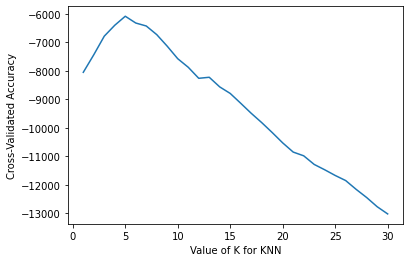

In [48]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [0]:
y_pred = grid.best_estimator_.predict(X_test)

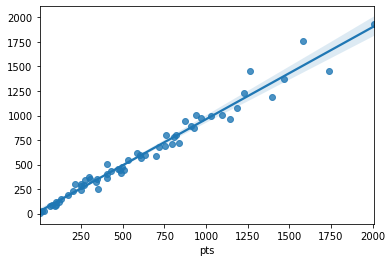

In [33]:
sns.regplot(x=y_test,y=y_pred)

In [34]:
print(f'rsquared error : {r2_score(y_test,y_pred)}')
print(f'RMSE score : {np.sqrt(mean_squared_error(y_test,y_pred))}')
print(f'MAE score : {mean_absolute_error(y_test,y_pred)}')

rsquared error : 0.9704147884597277
RMSE score : 78.73648517911283
MAE score : 54.875409836065586
